Mean Squared Error on the test set: 69.2492730779455
Calculated theta (coefficients): [74.63603167 11.69971514]


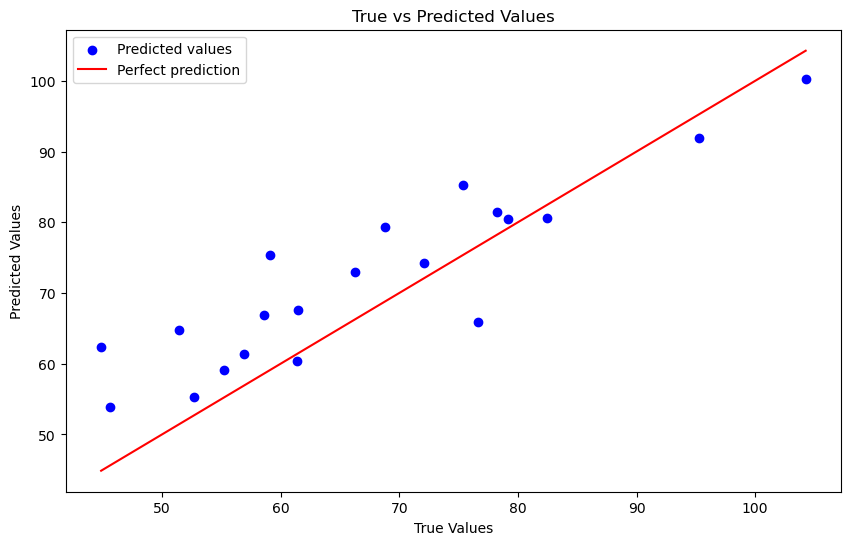

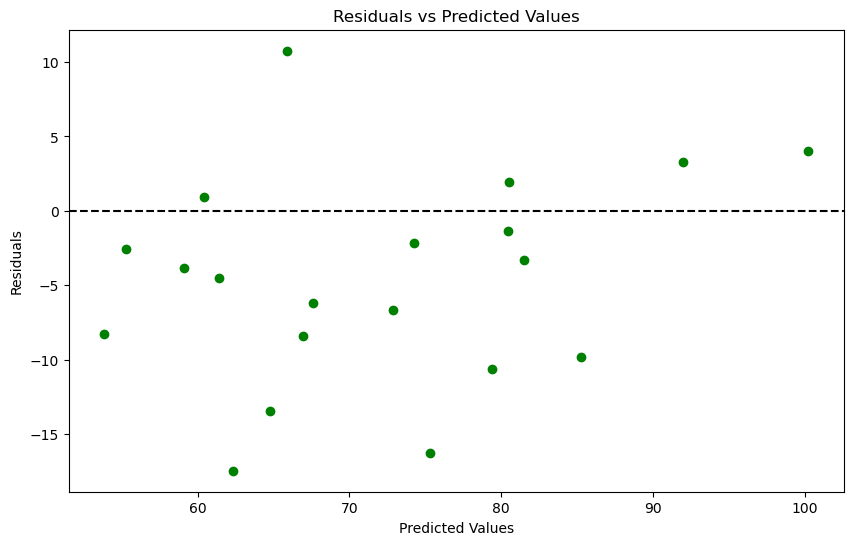

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
data = pd.read_csv('data.csv')

# Assuming the last column is the target (y) and all other columns are features (X)
X = data.iloc[:, :-1].values  # All rows, all columns except the last one
y = data.iloc[:, -1].values   # All rows, last column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient-based methods)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to X for the intercept term (bias)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Closed-form solution (Normal Equation)
def closed_form_solution(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Calculate the theta values using the normal equation
theta = closed_form_solution(X_train, y_train)

# Make predictions
y_pred = X_test @ theta

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

# Output the coefficients
print(f"Calculated theta (coefficients): {theta}")

# Plotting

# True vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Plot the residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
